Objective: Predict Closing Price for Bitcoin using the historic data

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv("bitstampUSD_1_min_data_2012_01_01_to_2018_11_11/bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv")

In [4]:
data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3603131,1541894100,6348.54,6348.54,6348.54,6348.54,0.007997,50.769274,6348.540000
3603132,1541894160,6348.54,6349.01,6348.54,6349.01,0.011729,74.466671,6348.936090
3603133,1541894220,6349.01,6349.01,6349.01,6349.01,0.068436,434.503642,6349.010000
3603134,1541894280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3603135,1541894340,6349.17,6349.32,6349.17,6349.32,0.038261,242.927410,6349.214148


Preprocessing of data
1. Convert Timestamp into Date column
2. Drop nans
3. Grouping and averaging the data by Date column


In [6]:
data['Date'] =  pd.to_datetime(data['Timestamp'], unit='s').dt.date
data.drop('Timestamp', inplace=True, axis=1)
data.Date.unique()

array([datetime.date(2011, 12, 31), datetime.date(2012, 1, 1),
       datetime.date(2012, 1, 2), ..., datetime.date(2018, 11, 8),
       datetime.date(2018, 11, 9), datetime.date(2018, 11, 10)],
      dtype=object)

In [7]:
data.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.388829e+06,2.388829e+06,2.388829e+06,2.388829e+06,2.388829e+06,2.388829e+06,2.388829e+06
mean,2.571487e+03,2.573625e+03,2.569058e+03,2.571462e+03,1.092451e+01,2.369349e+04,2.571320e+03
std,3.629093e+03,3.632869e+03,3.624712e+03,3.629059e+03,3.560609e+01,8.921983e+04,3.628797e+03
min,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,3.235200e+02,3.238000e+02,3.232900e+02,3.235100e+02,4.509416e-01,2.267963e+02,3.235000e+02
50%,6.227900e+02,6.230300e+02,6.223300e+02,6.228200e+02,2.092143e+00,1.595989e+03,6.227381e+02
75%,4.200930e+03,4.204930e+03,4.198480e+03,4.200880e+03,8.409572e+00,1.195215e+04,4.201000e+03
max,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,5.483271e+06,1.966330e+04


In [8]:
data.isnull().sum()/len(data)

Open                 0.337014
High                 0.337014
Low                  0.337014
Close                0.337014
Volume_(BTC)         0.337014
Volume_(Currency)    0.337014
Weighted_Price       0.337014
Date                 0.000000
dtype: float64

In [9]:
data = data.dropna()
data.isnull().sum()/len(data)

Open                 0.0
High                 0.0
Low                  0.0
Close                0.0
Volume_(BTC)         0.0
Volume_(Currency)    0.0
Weighted_Price       0.0
Date                 0.0
dtype: float64

In [10]:
data = data.groupby(['Date']).mean().reset_index()
data.head()

,Date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


Visualization of data

In [11]:
data.corr()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,1.000000,1.000000,1.000000,-0.163221,0.828254,1.000000
High,1.000000,1.000000,0.999999,1.000000,-0.163029,0.828547,1.000000
Low,1.000000,0.999999,1.000000,1.000000,-0.163436,0.827926,1.000000
Close,1.000000,1.000000,1.000000,1.000000,-0.163225,0.828247,1.000000
Volume_(BTC),-0.163221,-0.163029,-0.163436,-0.163225,1.000000,0.072644,-0.163235
Volume_(Currency),0.828254,0.828547,0.827926,0.828247,0.072644,1.000000,0.828232
Weighted_Price,1.000000,1.000000,1.000000,1.000000,-0.163235,0.828232,1.000000


In [12]:
data.corr().style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Open,1.000000,1.000000,1.000000,1.000000,-0.163221,0.828254,1.000000
High,1.000000,1.000000,0.999999,1.000000,-0.163029,0.828547,1.000000
Low,1.000000,0.999999,1.000000,1.000000,-0.163436,0.827926,1.000000
Close,1.000000,1.000000,1.000000,1.000000,-0.163225,0.828247,1.000000
Volume_(BTC),-0.163221,-0.163029,-0.163436,-0.163225,1.000000,0.072644,-0.163235
Volume_(Currency),0.828254,0.828547,0.827926,0.828247,0.072644,1.000000,0.828232
Weighted_Price,1.000000,1.000000,1.000000,1.000000,-0.163235,0.828232,1.000000



 Corr Matrix shows that the attributes Open, High, Low, Close and Weighted Price are highly correlated, but since the number of columns are not many, we would not drop the colums and try to use all columns in the model

<AxesSubplot:xlabel='Date'>

<Figure size 2160x1440 with 0 Axes>

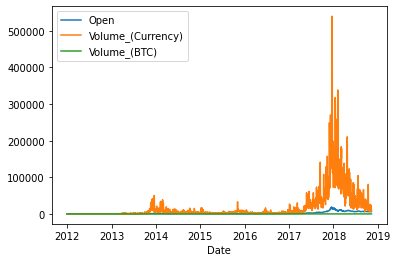

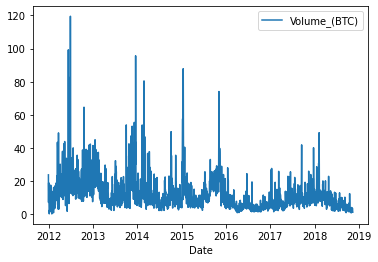

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
  
data.plot(x='Date', y=['Open','Volume_(Currency)', 'Volume_(BTC)'])
data.plot(x='Date', y='Volume_(BTC)')


 Corr Matrix shows that the attributes Open, High, Low, Close and Weighted Price are highly correlated, but since the number of columns are not many, we would not drop the colums and try to use all columns in the model

In [14]:
data = data.sort_values(by ='Date')

In [15]:
data.head()

,Date,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
1,2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2,2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
3,2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
4,2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [16]:
data.drop('Date', axis=1,inplace=True)


Nomalizing the data

In [17]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# pickle.dump(scaler, open("scaler.pkl", 'wb'))


In [18]:
scaled_data.shape

(2504, 7)

In [19]:
scaled_data[:5]

array([[6.94971486e-06, 7.85580963e-06, 6.95784156e-06, 7.86163155e-06,
        1.97693490e-01, 1.94649221e-04, 7.29524503e-06],
       [2.47583592e-05, 2.47392900e-05, 2.47873106e-05, 2.47576242e-05,
        5.82753379e-02, 6.30274236e-05, 2.47630077e-05],
       [3.48354457e-05, 3.48086151e-05, 3.48761808e-05, 3.48344116e-05,
        1.57604997e-01, 1.74110465e-04, 3.48419862e-05],
       [4.79964682e-05, 4.79595008e-05, 4.80525933e-05, 4.79950434e-05,
        9.01685381e-02, 1.05328662e-04, 4.80054798e-05],
       [4.52600180e-05, 4.64404216e-05, 4.53129431e-05, 4.64748384e-05,
        9.77993312e-02, 1.14623677e-04, 4.56938824e-05]])

Train Test Split

In [20]:
split_ratio = 0.95
train = scaled_data[:int(len(scaled_data)*split_ratio)]
test = scaled_data[int(len(scaled_data)*split_ratio): ]


In [21]:
train.shape, test.shape

((2378, 7), (126, 7))

Creating data in the form of (samples_size, timestep, features) where timestep is taken as 10.
Therefore, using the samples for 10 previous days, the Closing price of 11th day will be predicted

In [22]:
timestep = 10
train_x = []
train_y = []

for i in range(0, len(train)-timestep):
    train_x.append(train[i:i+timestep])
    train_y.append(train[i+timestep:i+ timestep+1, 3]) # 3 because Close is the third column


test_x = []
test_y = []

for i in range(0, len(test)-timestep):
    test_x.append(test[i:i+timestep])
    test_y.append(test[i+timestep:i+timestep+1, 3]) # 3 because Close is the third column

In [23]:
import numpy as np
train_x = np.reshape(train_x, [-1, timestep, train.shape[1]])
train_y = np.reshape(train_y, [-1, 1])

test_x = np.reshape(test_x, [-1, timestep, test.shape[1]])
test_y = np.reshape(test_y, [-1, 1])

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(2368, 10, 7) (2368, 1) (116, 10, 7) (116, 1)


Model building and training

Epoch 1/50
237/237 [==============================] - 2s 2ms/step - loss: 7.7771e-04
Epoch 2/50
237/237 [==============================] - 1s 3ms/step - loss: 5.9092e-04
Epoch 3/50
237/237 [==============================] - 1s 2ms/step - loss: 3.9312e-04
Epoch 4/50
237/237 [==============================] - 1s 2ms/step - loss: 3.3751e-04
Epoch 5/50
237/237 [==============================] - 1s 2ms/step - loss: 3.1244e-04
Epoch 6/50
237/237 [==============================] - 1s 2ms/step - loss: 2.5641e-04
Epoch 7/50
237/237 [==============================] - 1s 2ms/step - loss: 2.3548e-04
Epoch 8/50
237/237 [==============================] - 1s 2ms/step - loss: 2.6457e-04
Epoch 9/50
237/237 [==============================] - 1s 2ms/step - loss: 2.2687e-04
Epoch 10/50
237/237 [==============================] - 1s 2ms/step - loss: 2.1120e-04
Epoch 11/50
237/237 [==============================] - 1s 2ms/step - loss: 2.4165e-04
Epoch 12/50
237/237 [==============================] - 1s 2ms/s

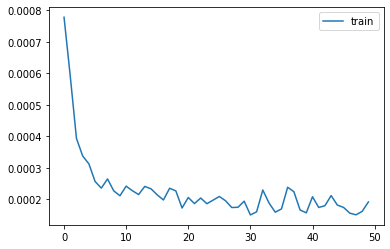

In [24]:

from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


# model
model = Sequential()
model.add(LSTM(50, input_shape = (train_x.shape[1], train_x.shape[2]))) 
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss= "mean_squared_error", optimizer = "adam")
history = model.fit(train_x, train_y, epochs=50, batch_size=10)

# plot history
pyplot.plot(history.history['loss'], label='train')

pyplot.legend()
pyplot.show()

Model Evaluation

In [25]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 2ms/step - loss: 1.2924e-04


0.00012923743634019047

Plotting of prediction from test data and actual data

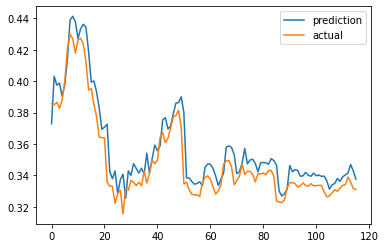

In [26]:
test_prediction = model.predict(test_x)

plt.plot(test_prediction,label='prediction')
plt.plot(test_y, label='actual')
plt.legend()